In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
#from prophet import Prophet
# import dash  # you need Dash version 1.15.0 or higher
# import dash_table
# import dash_html_components as html
# import dash_core_components as dcc
# from dash.dependencies import Input, Output,State
# import dash_auth
# from dash.dash_table import DataTable, FormatTemplate
# import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

# Data Reprocessing 

#### Read Production data

In [173]:
import pandas as pd

file_path = "D:\\Un Datathon\\Data\\Foastat\\Value_of_Production_E_All_Data_(Normalized) (1)\\Value_of_Production_E_All_Data_(Normalized).csv"

try:
    production = pd.read_csv(file_path, encoding='utf-8')
    # Process the DataFrame
except UnicodeDecodeError:
    # Try a different encoding
    production = pd.read_csv(file_path, encoding= 'ISO-8859-1')
    # Process the DataFrame
production.head(5)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1976,1976,1000 Int. $,49550.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1977,1977,1000 Int. $,45505.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1978,1978,1000 Int. $,60673.0,E
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1979,1979,1000 Int. $,53089.0,E
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1980,1980,1000 Int. $,50055.0,E


### Minumim Maximum Year

In [174]:
production['Year'].min(),production['Year'].max()

(1961, 2021)

### check nulls 

In [175]:
production.info(),production.isnull().sum(),production.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793889 entries, 0 to 2793888
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item Code (CPC)  object 
 5   Item             object 
 6   Element Code     int64  
 7   Element          object 
 8   Year Code        int64  
 9   Year             int64  
 10  Unit             object 
 11  Value            float64
 12  Flag             object 
dtypes: float64(1), int64(5), object(7)
memory usage: 277.1+ MB


(None,
 Area Code          0
 Area Code (M49)    0
 Area               0
 Item Code          0
 Item Code (CPC)    0
 Item               0
 Element Code       0
 Element            0
 Year Code          0
 Year               0
 Unit               0
 Value              0
 Flag               0
 dtype: int64,
 0)

### filter to constant prices

In [176]:
production['Element'].unique()

array(['Gross Production Value (constant 2014-2016 thousand I$)',
       'Gross Production Value (current thousand SLC)',
       'Gross Production Value (constant 2014-2016 thousand SLC)',
       'Gross Production Value (current thousand US$)',
       'Gross Production Value (constant 2014-2016 thousand US$)'],
      dtype=object)

In [178]:
production=production[(production['Element']=='Gross Production Value (constant 2014-2016 thousand I$)')]
production.head(3)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1976,1976,1000 Int. $,49550.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1977,1977,1000 Int. $,45505.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1978,1978,1000 Int. $,60673.0,E


In [7]:
production['Unit'].unique()

array(['1000 Int. $'], dtype=object)

In [8]:
# production=production[production['Unit']=='1000 Int. $']
# #production

### Drop columns in production un wanted 

In [181]:
production_current_dropped=production_current.drop(['Area Code','Area Code (M49)','Element Code','Item Code','Item Code (CPC)',\
                                    'Year Code','Flag','Unit'],axis=1)
production_current_dropped

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
6165,3,'008,Albania,515,'01341,Apples,57,Gross Production Value (current thousand US$),1993,1993,1000 US$,4610.0,E
6166,3,'008,Albania,515,'01341,Apples,57,Gross Production Value (current thousand US$),1995,1995,1000 US$,3236.0,E
6167,3,'008,Albania,515,'01341,Apples,57,Gross Production Value (current thousand US$),1996,1996,1000 US$,3254.0,E
6168,3,'008,Albania,515,'01341,Apples,57,Gross Production Value (current thousand US$),1997,1997,1000 US$,2860.0,E
6169,3,'008,Albania,515,'01341,Apples,57,Gross Production Value (current thousand US$),1998,1998,1000 US$,2863.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793823,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,57,Gross Production Value (current thousand US$),2017,2017,1000 US$,19584729.0,E
2793824,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,57,Gross Production Value (current thousand US$),2018,2018,1000 US$,20122873.0,E
2793825,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,57,Gross Production Value (current thousand US$),2019,2019,1000 US$,24792538.0,E
2793826,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,57,Gross Production Value (current thousand US$),2020,2020,1000 US$,25153785.0,E


In [9]:
production_dropped=production.drop(['Area Code','Area Code (M49)','Element Code','Item Code','Item Code (CPC)',\
                                    'Year Code','Flag','Unit'],axis=1)
production_dropped

,Area,Item,Element,Year,Value
0,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1976,49550.0
1,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1977,45505.0
2,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1978,60673.0
3,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1979,53089.0
4,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1980,50055.0
...,...,...,...,...,...
2793792,Net Food Importing Developing Countries,Vegetables Primary,Gross Production Value (constant 2014-2016 tho...,2017,33489292.0
2793793,Net Food Importing Developing Countries,Vegetables Primary,Gross Production Value (constant 2014-2016 tho...,2018,34556366.0
2793794,Net Food Importing Developing Countries,Vegetables Primary,Gross Production Value (constant 2014-2016 tho...,2019,35539690.0
2793795,Net Food Importing Developing Countries,Vegetables Primary,Gross Production Value (constant 2014-2016 tho...,2020,36399160.0


### Filter on Agriculture items & World production

In [10]:
Agriculture_World=production_dropped[(production_dropped['Item']=='Agriculture') & (production_dropped['Area']=='World')]
Agriculture_World

,Area,Item,Element,Year,Value
2165860,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,1.083667e+09
2165861,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1962,1.118482e+09
2165862,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1963,1.146767e+09
2165863,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1964,1.184759e+09
2165864,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1965,1.210465e+09
...,...,...,...,...,...
2165916,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,2017,3.909425e+09
2165917,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,2018,3.951008e+09
2165918,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,2019,3.993589e+09
2165919,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,4.050315e+09


### Aggregation

In [11]:
type_count=production_dropped.groupby(['Area','Year',]).agg({'Value':'sum'}) 
type_count.rename({'Value':"sum"},axis=1,inplace=True)
type_count = type_count.reset_index()
type_count

,Area,Year,sum
0,Afghanistan,1961,13108985.0
1,Afghanistan,1962,13279590.0
2,Afghanistan,1963,13331206.0
3,Afghanistan,1964,14351979.0
4,Afghanistan,1965,15002948.0
...,...,...,...
13572,Zimbabwe,2017,22812305.0
13573,Zimbabwe,2018,24534597.0
13574,Zimbabwe,2019,23240113.0
13575,Zimbabwe,2020,24307864.0


### Emission 

In [12]:
file_path="D:\\Un Datathon\\Data\\Foastat\\Emissions_Totals_E_All_Data_(Normalized) (1)\\Emissions_Totals_E_All_Data_(Normalized).csv"
try:
    Emission = pd.read_csv(file_path, encoding='utf-8')
    # Process the DataFrame
except UnicodeDecodeError:
    # Try a different encoding
    Emission = pd.read_csv(file_path, encoding='latin-1')
    # Process the DataFrame

In [13]:
Emission.head(3)

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1961,1961,3050,FAO TIER 1,kilotonnes,0.8762,E,NaN
1,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1962,1962,3050,FAO TIER 1,kilotonnes,0.8829,E,NaN
2,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1963,1963,3050,FAO TIER 1,kilotonnes,0.8236,E,NaN


#### Check 

In [14]:
Emission['Element'].value_counts(),Emission.isnull().sum(),Emission.duplicated().sum()

(Element
 Emissions (CO2eq) (AR5)                 408002
 Emissions (N2O)                         332518
 Emissions (CO2eq) from N2O (AR5)        330883
 Emissions (CH4)                         273051
 Emissions (CO2eq) from CH4 (AR5)        271497
 Emissions (CO2)                         193536
 Direct emissions (N2O)                   86472
 Indirect emissions (N2O)                 82119
 Emissions (CO2eq) from F-gases (AR5)     46909
 Name: count, dtype: int64,
 Area Code                0
 Area Code (M49)          0
 Area                     0
 Item Code                0
 Item                     0
 Element Code             0
 Element                  0
 Year Code                0
 Year                     0
 Source Code              0
 Source                   0
 Unit                     0
 Value                    0
 Flag                     0
 Note               2024987
 dtype: int64,
 0)

### Preprocessing

### Drop un wanted Columns

In [15]:
Emission_dropped=Emission.drop(['Area Code','Area Code (M49)','Item Code','Element Code',\
                              'Year Code','Source','Source Code','Flag','Note','Unit'],axis=1)
Emission_dropped#=#Emission_final[(Emission_final['Year']>=2010) & (Emission_final['Year']<=2023)]
Emission_dropped

,Area,Item,Element,Year,Value
0,Afghanistan,Crop Residues,Direct emissions (N2O),1961,8.762000e-01
1,Afghanistan,Crop Residues,Direct emissions (N2O),1962,8.829000e-01
2,Afghanistan,Crop Residues,Direct emissions (N2O),1963,8.236000e-01
3,Afghanistan,Crop Residues,Direct emissions (N2O),1964,8.882000e-01
4,Afghanistan,Crop Residues,Direct emissions (N2O),1965,8.978000e-01
...,...,...,...,...,...
2024982,OECD,All sectors without LULUCF,Emissions (CO2eq) (AR5),2018,1.621034e+07
2024983,OECD,All sectors without LULUCF,Emissions (CO2eq) (AR5),2019,1.578256e+07
2024984,OECD,All sectors without LULUCF,Emissions (CO2eq) (AR5),2020,1.443647e+07
2024985,OECD,All sectors without LULUCF,Emissions (CO2eq) (AR5),2030,1.204272e+06


In [16]:
World_Emission=Emission_dropped[Emission['Area']=="World"]

In [17]:
World_Emission

,Area,Item,Element,Year,Value
1704749,World,Crop Residues,Direct emissions (N2O),1961,2.212059e+02
1704750,World,Crop Residues,Direct emissions (N2O),1962,2.313731e+02
1704751,World,Crop Residues,Direct emissions (N2O),1963,2.333363e+02
1704752,World,Crop Residues,Direct emissions (N2O),1964,2.446206e+02
1704753,World,Crop Residues,Direct emissions (N2O),1965,2.433055e+02
...,...,...,...,...,...
1715688,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2018,5.217827e+07
1715689,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2019,5.233847e+07
1715690,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2020,5.061739e+07
1715691,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2030,5.934315e+06


### Aggregate Emmissions 

In [18]:
type_count=Emission_dropped.groupby(['Area','Year','Element']).agg({'Value':'mean'}) 
type_count.rename({'Value':"Mean"},axis=1,inplace=True)
type_count = type_count.reset_index()
type_count.head()

,Area,Year,Element,Mean
0,Afghanistan,1961,Direct emissions (N2O),3.645600
1,Afghanistan,1961,Emissions (CH4),142.889650
2,Afghanistan,1961,Emissions (CO2eq) (AR5),3181.758264
3,Afghanistan,1961,Emissions (CO2eq) from CH4 (AR5),4000.910250
4,Afghanistan,1961,Emissions (CO2eq) from N2O (AR5),1221.542156


### join Emission with production with agg

In [19]:
Agriculture=production_dropped[(production_dropped['Item']=='Agriculture')]
Agriculture

,Area,Item,Element,Year,Value
4302,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0
4303,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1962,2611942.0
4304,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1963,2632254.0
4305,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1964,2810010.0
4306,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1965,2932230.0
...,...,...,...,...,...
2791956,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2017,452896993.0
2791957,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2018,458594747.0
2791958,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2019,471367604.0
2791959,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0


In [20]:
Production_Emission_withagg=pd.merge(Agriculture,type_count,how='inner',left_on=['Area','Year'],right_on=['Area','Year'])
#integ.drop('Year',axis=1,inplace=True)
Production_Emission_withagg.rename(columns={
                                     'Element_x': 'Production_Elment',
                                    'Element_y':'Element_Emission'}, inplace=True)
# Production_Emission_withoutagg
Production_Emission_withagg

,Area,Item,Production_Elment,Year,Value,Element_Emission,Mean
0,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Direct emissions (N2O),3.645600
1,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Emissions (CH4),142.889650
2,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Emissions (CO2eq) (AR5),3181.758264
3,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Emissions (CO2eq) from CH4 (AR5),4000.910250
4,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Emissions (CO2eq) from N2O (AR5),1221.542156
...,...,...,...,...,...,...,...
106802,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,Emissions (CO2eq) from CH4 (AR5),367756.326478
106803,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,Emissions (CO2eq) from F-gases (AR5),22383.112744
106804,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,Emissions (CO2eq) from N2O (AR5),136622.711528
106805,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,Emissions (N2O),515.556558


### Write data as csv

In [21]:
# Production_Emission_withagg.to_csv("D:\\Un Datathon\\Data\\Final\\Production_Emission_withagg.csv")

### Join with out agg

In [129]:
Production_Emission_withoutagg=pd.merge(Agriculture,Emission_dropped,how='inner',left_on=['Area','Year'],right_on=['Area','Year'])
Production_Emission_withoutagg.rename(columns={'Item_x': 'Production_Item', 
                                    'Element_x': 'Production_Elment', 'Value_x':'Production_Value','Item_y':'Item_Emission',
                                   'Element_y':'Element_Emission','Value_y':'Value_Emission'}, inplace=True)
Production_Emission_withoutagg

,Area,Production_Item,Production_Elment,Year,Production_Value,Item_Emission,Element_Emission,Value_Emission
0,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Crop Residues,Direct emissions (N2O),8.762000e-01
1,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Crop Residues,Indirect emissions (N2O),1.972000e-01
2,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Crop Residues,Emissions (N2O),1.073400e+00
3,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Crop Residues,Emissions (CO2eq) from N2O (AR5),2.844486e+02
4,Afghanistan,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,2566730.0,Crop Residues,Emissions (CO2eq) (AR5),2.844486e+02
...,...,...,...,...,...,...,...,...
1832478,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,All sectors without LULUCF,Emissions (CO2),1.353347e+06
1832479,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),1.301413e+04
1832480,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),1.768564e+06
1832481,Net Food Importing Developing Countries,Agriculture,Gross Production Value (constant 2014-2016 tho...,2020,485658023.0,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),5.423356e+05


### write data as csv

In [23]:
# Production_Emission_withoutagg.to_csv("D:\\Un Datathon\\Data\\Final\\Production_Emission_withoutagg.csv")

### Pivot emmission data 

In [24]:
World_Emission['Item'].unique()#=="Agriclture"

array(['Crop Residues', 'Rice Cultivation', 'Burning - Crop residues',
       'Enteric Fermentation', 'Manure Management',
       'Manure left on Pasture', 'Manure applied to Soils',
       'Synthetic Fertilizers', 'Drained organic soils',
       'Drained organic soils (CO2)', 'Drained organic soils (N2O)',
       'On-farm energy use', 'Forestland', 'Net Forest conversion',
       'Savanna fires', 'Fires in organic soils', 'Forest fires',
       'Fires in humid tropical forests',
       'Agrifood Systems Waste Disposal', 'Fertilizers Manufacturing',
       'Pesticides Manufacturing', 'On-farm Heat Use',
       'On-farm Electricity Use', 'Food Processing', 'Food Packaging',
       'Food Retail', 'Food Household Consumption', 'Food Transport',
       'Energy', 'IPPU', 'Waste', 'International bunkers', 'Other',
       'Farm gate', 'Land Use change', 'Emissions on agricultural land',
       'Pre- and Post- Production', 'Agrifood systems',
       'IPCC Agriculture', 'Agricultural Soils', 'L

In [25]:
World_Emission

,Area,Item,Element,Year,Value
1704749,World,Crop Residues,Direct emissions (N2O),1961,2.212059e+02
1704750,World,Crop Residues,Direct emissions (N2O),1962,2.313731e+02
1704751,World,Crop Residues,Direct emissions (N2O),1963,2.333363e+02
1704752,World,Crop Residues,Direct emissions (N2O),1964,2.446206e+02
1704753,World,Crop Residues,Direct emissions (N2O),1965,2.433055e+02
...,...,...,...,...,...
1715688,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2018,5.217827e+07
1715689,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2019,5.233847e+07
1715690,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2020,5.061739e+07
1715691,World,All sectors without LULUCF,Emissions (CO2eq) (AR5),2030,5.934315e+06


In [26]:
c=World_Emission[World_Emission['Element']=='Emissions (N2O)']
c

,Area,Item,Element,Year,Value
1704904,World,Crop Residues,Emissions (N2O),1961,270.9773
1704905,World,Crop Residues,Emissions (N2O),1962,283.4321
1704906,World,Crop Residues,Emissions (N2O),1963,285.8370
1704907,World,Crop Residues,Emissions (N2O),1964,299.6602
1704908,World,Crop Residues,Emissions (N2O),1965,298.0492
...,...,...,...,...,...
1715527,World,All sectors without LULUCF,Emissions (N2O),2018,10559.7850
1715528,World,All sectors without LULUCF,Emissions (N2O),2019,10603.8751
1715529,World,All sectors without LULUCF,Emissions (N2O),2020,10772.4573
1715530,World,All sectors without LULUCF,Emissions (N2O),2030,7036.1533


In [183]:
pivot_emission=World_Emission.pivot_table(index=['Area','Year'],columns=['Element'],values='Value',aggfunc='mean')
pivot_emission.reset_index()

Element,Area,Year,Item,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from F-gases (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
0,World,1961,Agricultural Soils,1842.0933,NaN,NaN,6.337327e+05,NaN,NaN,633732.7012,2391.4442,549.3508
1,World,1961,Agrifood systems,NaN,90641.0618,NaN,3.261835e+06,2.537950e+06,NaN,723885.0240,2731.6416,NaN
2,World,1961,Burning - Crop residues,NaN,692.5150,NaN,2.414825e+04,1.939042e+04,NaN,4757.8345,17.9541,NaN
3,World,1961,Crop Residues,221.2059,NaN,NaN,7.180898e+04,NaN,NaN,71808.9779,270.9773,49.7713
4,World,1961,Enteric Fermentation,NaN,65345.0181,NaN,1.829661e+06,1.829661e+06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1710,World,2050,Manure Management,NaN,11234.8125,NaN,3.145747e+05,3.145747e+05,NaN,NaN,NaN,NaN
1711,World,2050,Manure applied to Soils,552.0935,NaN,NaN,2.084843e+05,NaN,NaN,208484.3240,786.7333,234.6398
1712,World,2050,Manure left on Pasture,2778.5212,NaN,NaN,9.324787e+05,NaN,NaN,932478.6762,3518.7875,740.2662
1713,World,2050,Rice Cultivation,NaN,23467.3142,NaN,6.570848e+05,6.570848e+05,NaN,NaN,NaN,NaN


In [64]:
ml_use=pd.merge(Agriculture_World,pivot_emission,how='left',left_on=['Area','Year'],right_on=['Area','Year'])
# #integ.drop('Year',axis=1,inplace=True)
# #Production_Emission_withagg.rename(columns={
#                                      'Element_x': 'Production_Elment',
#                                     'Element_y':'Element_Emission'}, inplace=True)
# Production_Emission_withoutagg
ml_use.head()

,Area,Item,Element,Year,Value,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from F-gases (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
0,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1961,1.083667e+09,921.046650,45320.530900,NaN,9.472034e+05,1.268975e+06,NaN,311709.748133,1176.263211,274.675400
1,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1962,1.118482e+09,949.056533,46197.393833,NaN,9.679992e+05,1.293527e+06,NaN,320758.748944,1210.410389,282.982267
2,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1963,1.146767e+09,972.081300,46589.456933,NaN,9.802791e+05,1.304505e+06,NaN,328449.022067,1239.430267,289.938750
3,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1964,1.184759e+09,1003.153100,47418.463000,NaN,1.000809e+06,1.327717e+06,NaN,338065.860011,1275.720222,298.363083
4,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1965,1.210465e+09,1039.440400,48080.514967,NaN,1.020766e+06,1.346254e+06,NaN,350099.507433,1321.130211,309.545500


In [65]:
ml_use.columns

Index(['Area', 'Item', 'Element', 'Year', 'Value', 'Direct emissions (N2O)',
       'Emissions (CH4)', 'Emissions (CO2)', 'Emissions (CO2eq) (AR5)',
       'Emissions (CO2eq) from CH4 (AR5)',
       'Emissions (CO2eq) from F-gases (AR5)',
       'Emissions (CO2eq) from N2O (AR5)', 'Emissions (N2O)',
       'Indirect emissions (N2O)'],
      dtype='object')

In [66]:
ml_use.set_index('Year',inplace=True)
ml_use

,Area,Item,Element,Value,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from F-gases (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
Year,,,,,,,,,,,,,
1961,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.083667e+09,921.046650,45320.530900,NaN,9.472034e+05,1.268975e+06,NaN,311709.748133,1176.263211,274.675400
1962,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.118482e+09,949.056533,46197.393833,NaN,9.679992e+05,1.293527e+06,NaN,320758.748944,1210.410389,282.982267
1963,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.146767e+09,972.081300,46589.456933,NaN,9.802791e+05,1.304505e+06,NaN,328449.022067,1239.430267,289.938750
1964,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.184759e+09,1003.153100,47418.463000,NaN,1.000809e+06,1.327717e+06,NaN,338065.860011,1275.720222,298.363083
1965,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.210465e+09,1039.440400,48080.514967,NaN,1.020766e+06,1.346254e+06,NaN,350099.507433,1321.130211,309.545500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,3.909425e+09,1798.781890,49445.696047,3.936336e+06,3.730408e+06,1.384480e+06,665794.376922,496706.147613,1874.367713,680.944314
2018,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,3.951008e+09,1794.242560,49863.821648,4.046141e+06,3.802846e+06,1.396187e+06,692122.776567,492270.283794,1857.628298,681.691271
2019,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,3.993589e+09,1808.583730,50563.788502,4.081634e+06,3.841827e+06,1.415786e+06,701520.874389,496800.068715,1874.722215,687.330557


In [67]:
#df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column
sorted_df = ml_use.sort_values(by='Year')

# Optionally, reset the index to reindex the sorted DataFrame
#sorted_df.reset_index(drop=True, inplace=True)
sorted_df

,Area,Item,Element,Value,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from F-gases (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
Year,,,,,,,,,,,,,
1961,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.083667e+09,921.046650,45320.530900,NaN,9.472034e+05,1.268975e+06,NaN,311709.748133,1176.263211,274.675400
1962,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.118482e+09,949.056533,46197.393833,NaN,9.679992e+05,1.293527e+06,NaN,320758.748944,1210.410389,282.982267
1963,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.146767e+09,972.081300,46589.456933,NaN,9.802791e+05,1.304505e+06,NaN,328449.022067,1239.430267,289.938750
1964,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.184759e+09,1003.153100,47418.463000,NaN,1.000809e+06,1.327717e+06,NaN,338065.860011,1275.720222,298.363083
1965,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,1.210465e+09,1039.440400,48080.514967,NaN,1.020766e+06,1.346254e+06,NaN,350099.507433,1321.130211,309.545500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,3.909425e+09,1798.781890,49445.696047,3.936336e+06,3.730408e+06,1.384480e+06,665794.376922,496706.147613,1874.367713,680.944314
2018,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,3.951008e+09,1794.242560,49863.821648,4.046141e+06,3.802846e+06,1.396187e+06,692122.776567,492270.283794,1857.628298,681.691271
2019,World,Agriculture,Gross Production Value (constant 2014-2016 tho...,3.993589e+09,1808.583730,50563.788502,4.081634e+06,3.841827e+06,1.415786e+06,701520.874389,496800.068715,1874.722215,687.330557


In [69]:
droped_ml=sorted_df.drop(columns=['Area','Item','Element'],axis=1)
droped_ml

,Value,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from F-gases (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
Year,,,,,,,,,,
1961,1.083667e+09,921.046650,45320.530900,NaN,9.472034e+05,1.268975e+06,NaN,311709.748133,1176.263211,274.675400
1962,1.118482e+09,949.056533,46197.393833,NaN,9.679992e+05,1.293527e+06,NaN,320758.748944,1210.410389,282.982267
1963,1.146767e+09,972.081300,46589.456933,NaN,9.802791e+05,1.304505e+06,NaN,328449.022067,1239.430267,289.938750
1964,1.184759e+09,1003.153100,47418.463000,NaN,1.000809e+06,1.327717e+06,NaN,338065.860011,1275.720222,298.363083
1965,1.210465e+09,1039.440400,48080.514967,NaN,1.020766e+06,1.346254e+06,NaN,350099.507433,1321.130211,309.545500
...,...,...,...,...,...,...,...,...,...,...
2017,3.909425e+09,1798.781890,49445.696047,3.936336e+06,3.730408e+06,1.384480e+06,665794.376922,496706.147613,1874.367713,680.944314
2018,3.951008e+09,1794.242560,49863.821648,4.046141e+06,3.802846e+06,1.396187e+06,692122.776567,492270.283794,1857.628298,681.691271
2019,3.993589e+09,1808.583730,50563.788502,4.081634e+06,3.841827e+06,1.415786e+06,701520.874389,496800.068715,1874.722215,687.330557


In [70]:
# Create a scatter plot
for i in droped_ml.columns.drop(['Value']):
    fig = go.Figure(data=go.Scatter(x=droped_ml[i], y=droped_ml['Value'], mode='markers'))
    # Set axis labels and plot title
    fig.update_layout(
    xaxis_title=i,
    yaxis_title='Production',
    title='Scatter Plot Example'
    )
# Show the plot
    fig.show()
     # Change the file path and format as needed
# Save the figure to the specified file
    #pio.write_image(fig, 'D:\\Un Datathon\\'+i+'.png')

In [71]:
#!pip install -U kaleido

In [72]:
# ml_use.to_csv("D:\\Un Datathon\\Data\\Final\\ml_use.csv")

In [73]:
# import pandas as pd
# data={
#     'ID': [1, 2, 3],
#     'Name': ['Alice', 'Bob', 'Charlie'],
#     'Math_Score': [90, 85, 78],
#     'Science_Score': [88, 92, 76],
# }
# df = pd.DataFrame(data)
# df_long = pd.melt(df,id_vars=['ID', 'Name'], var_name='Subject', value_name='Score')

In [52]:
prices_food['country_name'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin', 'Bhutan',
       'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Ethiopia',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Guinea', 'Haiti', 'Honduras', 'Bassas da India',
       'Indonesia', 'Iran  (Islamic Republic of)', 'Iraq', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Moldova Republic of', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
       'Pakistan', 'Pa

### Null filling 

In [135]:
droped_ml=droped_ml.iloc[:-1] 

In [136]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression#descending
lr = LinearRegression()#estimator=lr
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20,verbose=1,imputation_order='ascending',random_state=0)
X=imp.fit_transform(droped_ml)
missing_filled=pd.DataFrame(X,columns=droped_ml.columns,index=droped_ml.index)#,index=df.index)#df.q
missing_filled

[IterativeImputer] Completing matrix with shape (60, 10)
[IterativeImputer] Change: 4478658.141404902, scaled tolerance: 4050314.909 
[IterativeImputer] Change: 363245.2634334564, scaled tolerance: 4050314.909 
[IterativeImputer] Early stopping criterion reached.


,Value,Direct emissions (N2O),Emissions (CH4),Emissions (CO2),Emissions (CO2eq) (AR5),Emissions (CO2eq) from CH4 (AR5),Emissions (CO2eq) from F-gases (AR5),Emissions (CO2eq) from N2O (AR5),Emissions (N2O),Indirect emissions (N2O)
Year,,,,,,,,,,
1961,1.083667e+09,921.046650,45320.530900,-1.290128e+05,9.472034e+05,1.268975e+06,-441168.834081,311709.748133,1176.263211,274.675400
1962,1.118482e+09,949.056533,46197.393833,-1.287567e+05,9.679992e+05,1.293527e+06,-430996.829364,320758.748944,1210.410389,282.982267
1963,1.146767e+09,972.081300,46589.456933,-1.299022e+05,9.802791e+05,1.304505e+06,-421475.102663,328449.022067,1239.430267,289.938750
1964,1.184759e+09,1003.153100,47418.463000,-1.315460e+05,1.000809e+06,1.327717e+06,-410384.015074,338065.860011,1275.720222,298.363083
1965,1.210465e+09,1039.440400,48080.514967,-1.313510e+05,1.020766e+06,1.346254e+06,-399449.740717,350099.507433,1321.130211,309.545500
1966,1.254340e+09,1085.903267,49001.694800,-1.325115e+05,1.047125e+06,1.372047e+06,-383736.231393,365121.256356,1377.816056,323.289000
1967,1.299303e+09,1123.096800,49903.622400,-1.330648e+05,1.070992e+06,1.397301e+06,-369521.137966,377456.042989,1424.362422,334.485650
1968,1.337369e+09,1158.835600,50634.894300,-1.343387e+05,1.091364e+06,1.417777e+06,-356597.433947,388704.121578,1466.808000,344.963250
1969,1.344597e+09,1182.345350,50897.273367,-1.344683e+05,1.101261e+06,1.425124e+06,-350900.073791,395902.738489,1493.972600,352.123750


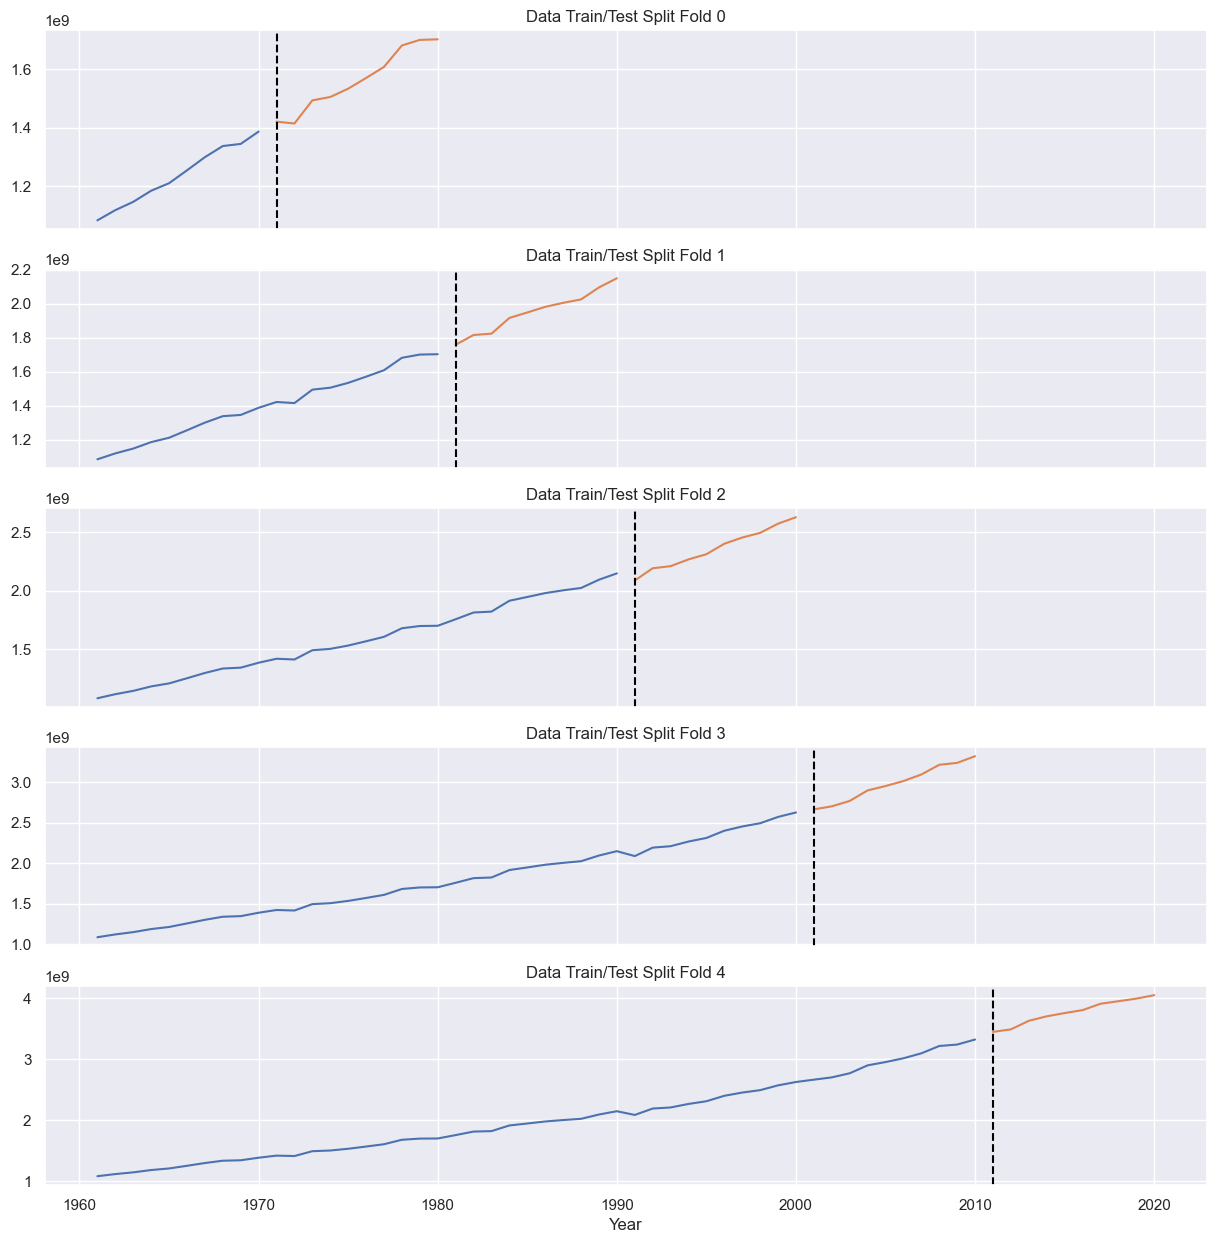

In [137]:
from sklearn.model_selection import TimeSeriesSplit
sns.set(font_scale=1)
tss = TimeSeriesSplit(n_splits=5,test_size=10,gap=0)
#color_pal = sns.color_palette()
#plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(droped_ml):
    train = droped_ml.iloc[train_idx]
    test = droped_ml.iloc[val_idx]
    train['Value'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Value'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [149]:
from xgboost.sklearn import XGBRegressor as xgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [150]:
#data_lagged = data_lagged.sort_index()
fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(droped_ml):
    train = droped_ml.iloc[train_idx]
    test = droped_ml.iloc[val_idx]

    #train = create_features(train)
    #test = create_features(test)

    FEATURES=droped_ml.columns.drop('Value')
    TARGET='Value'
    
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg=xgb.XGBRegressor(base_score=0.5, booster='gblinear',    
                           n_estimators=10000,
                           #early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=10,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            #eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[23:24:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[23:24:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[23:24:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/o

In [151]:
print(f'sqr Mean Score across folds {np.mean(scores):0.5f}')
print(f'Fold scores:{scores}')

sqr Mean Score across folds 121655841.65085
Fold scores:[21973036.031711027, 179988976.53135383, 110682506.3319024, 255616911.16058433, 40017778.19869465]


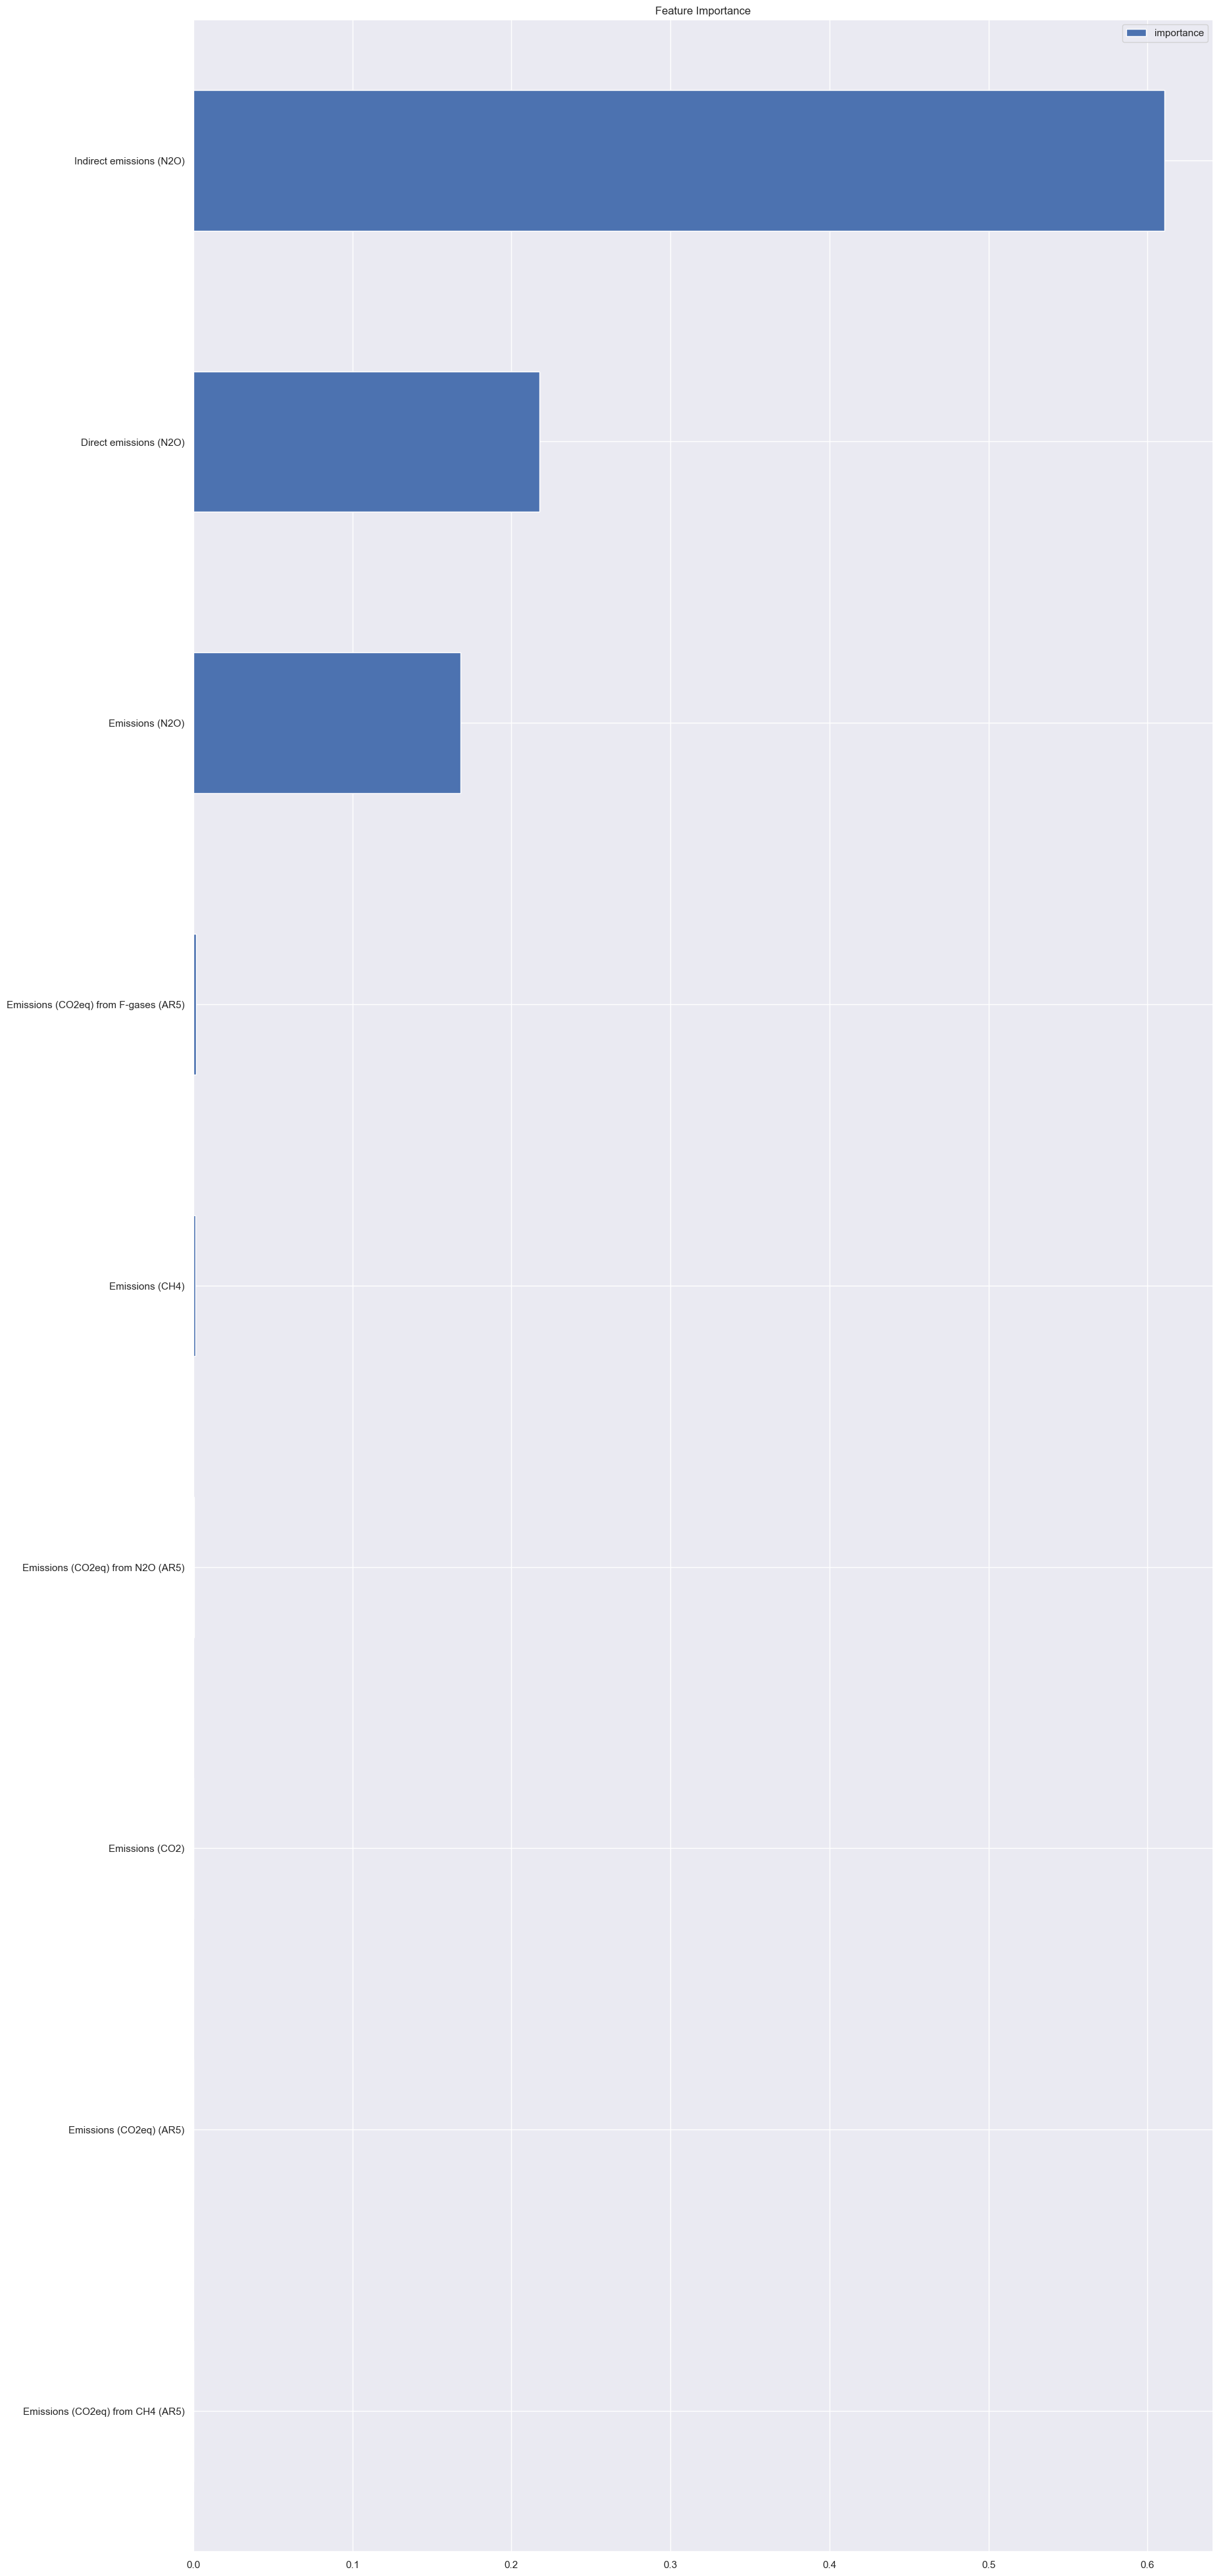

In [152]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance',figsize=(20,50))
plt.show()

In [153]:
nobs=10
train,test=droped_ml[0:-nobs],droped_ml[-nobs:]
train.shape,test.shape

((50, 10), (10, 10))

In [154]:
FEATURES = droped_ml.columns.drop('Value')
TARGET='Value'
X_train=train[FEATURES]
y_train=train[TARGET]
X_test=test[FEATURES]
y_test=test[TARGET]

In [155]:
reg = xgb.XGBRegressor(base_score=0.1, booster='gblinear',     #gbtree  gblinear
                           n_estimators=10000,
                           #early_stopping_rounds=50,
                           objective='reg:linear', # 'reg:squarederror'reg:pseudohubererror 'reg:linear' reg:squaredlogerror'
                           max_depth=100,
                           learning_rate=0.1,n_jobs=-1)
reg.fit(X_train, y_train,
            #eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

[23:24:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.



XGBRegressor(base_score=0.1, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [189]:
y_pred=reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

38696223.05464409

In [190]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test)
r2

1.0

In [191]:
from sklearn.metrics import mean_absolute_percentage_error
100-mean_absolute_percentage_error(y_test,y_pred)*100

99.1903453514701

In [192]:
test['y_pred']=reg.predict(X_test)
test[['y_pred','Value']]

C:\Users\idsc\AppData\Local\Temp\ipykernel_13856\2567962849.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y_pred,Value
Year,,
2011,3.374089e+09,3.448435e+09
2012,3.481672e+09,3.490019e+09
2013,3.580440e+09,3.630376e+09
2014,3.664499e+09,3.703589e+09
2015,3.761684e+09,3.757330e+09
2016,3.741652e+09,3.805259e+09
2017,3.896498e+09,3.909425e+09
2018,3.959170e+09,3.951008e+09
2019,3.999921e+09,3.993589e+09


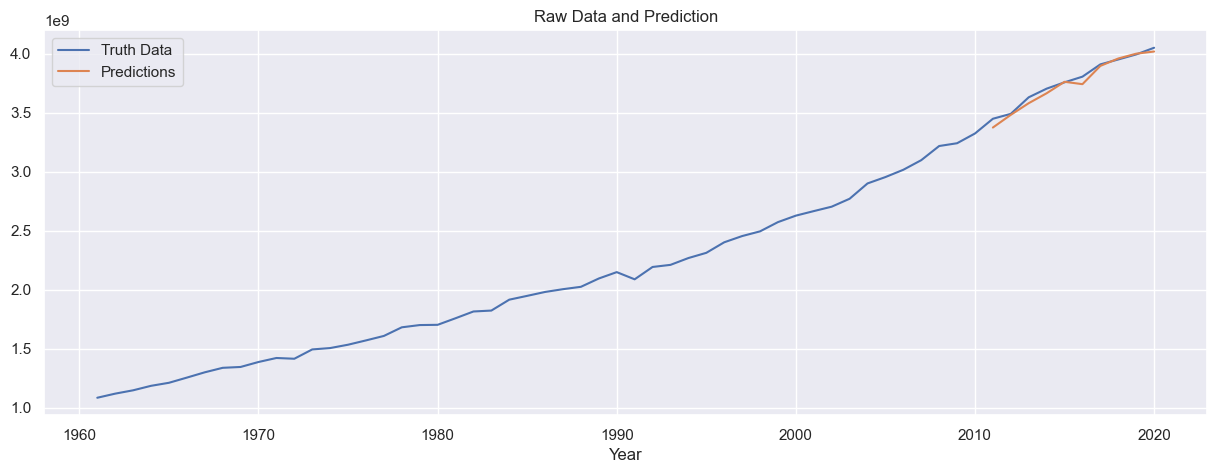

In [159]:
ax = droped_ml[['Value']].plot(style='-',figsize=(15,5))
test['y_pred'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [124]:
#production_dropped=production_dropped['Element'].astype(object)

In [125]:
# Emission_final.to_csv("D:\\Un Datathon\\Data\\Foastat\\Emissions_Totals_E_All_Data_(Normalized)\\Emissions_preprocessed.csv"\
#                      )

In [126]:
# production_dropped.to_csv("D:\\Un Datathon\\Data\\Foastat\\Value_of_Production_E_All_Data_(Normalized) (1)\\production_preprocessed.csv"\
#                      )

In [161]:
prices_food=pd.read_csv("D:\\Un Datathon\\Data\\Final\\World_food_prices_filtered_final.csv",encoding='utf-8')
prices_food['commodity_name'].unique()

array(['Bread', 'Wheat', 'Rice', 'Wage', 'Fuel', 'Exchange rate', 'Oil',
       'Sugar', 'Pulses', 'Wheat flour', 'Salt', 'Beans', 'Milk',
       'Potatoes', 'Eggs', 'Meat', 'Lentils', 'Pasta', 'Tomatoes',
       'Cheese', 'Carrots', 'Onions', 'Bananas', 'Tea', 'Fish', 'Apples',
       'Oranges', 'Cassava flour', 'Maize flour', 'Maize meal', 'Maize',
       'Peas', 'Cabbage', 'Cucumbers', 'Beetroots', 'Buckwheat',
       'Sorghum', 'Millet', 'Sweet potatoes', 'Yam', 'Plantains',
       'Soybeans', 'Cassava', 'Lemons', 'Cassava meal', 'Papaya', 'Okra',
       'Groundnuts', 'Peppers', 'Coconut', 'Leafy vegetables', 'Shrimps',
       'Taro', 'Snail', 'Noodles', 'Quinoa', 'Avocados', 'Eggplants',
       'Snake gourd', 'Water spinach', 'Wax gourd', 'Prawn', 'Chicken',
       'Cocoyam', 'Sesame', 'Cowpeas', 'Squashes', 'Charcoal', 'Water',
       'Laundry soap', 'Laundry detergent', 'Livestock', 'Peanut',
       'Garlic', 'Cocoa', 'Coffee', 'Chickpeas', 'Cauliflower', 'Spinach',
       'Blac

In [165]:
production.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1976,1976,1000 Int. $,49550.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1977,1977,1000 Int. $,45505.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1978,1978,1000 Int. $,60673.0,E
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1979,1979,1000 Int. $,53089.0,E
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1980,1980,1000 Int. $,50055.0,E


In [166]:
Emission.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1961,1961,3050,FAO TIER 1,kilotonnes,0.8762,E,NaN
1,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1962,1962,3050,FAO TIER 1,kilotonnes,0.8829,E,NaN
2,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1963,1963,3050,FAO TIER 1,kilotonnes,0.8236,E,NaN
3,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1964,1964,3050,FAO TIER 1,kilotonnes,0.8882,E,NaN
4,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1965,1965,3050,FAO TIER 1,kilotonnes,0.8978,E,NaN


In [167]:
prices_food.head()

,Unnamed: 0,country_id,country_name,commodity_id,commodity_name,currency_id,currency_name,pricetype_id,pricetype_name,usdcurrency_id,usdcurrency_name,mp_year,mp_price
0,0,1.0,Afghanistan,55,Bread,0.0,AFN,15,Retail,5,KG,2014,50.000000
1,1,1.0,Afghanistan,55,Bread,0.0,AFN,15,Retail,5,KG,2015,52.700000
2,2,1.0,Afghanistan,55,Bread,0.0,AFN,15,Retail,5,KG,2016,51.000000
3,3,1.0,Afghanistan,55,Bread,0.0,AFN,15,Retail,5,KG,2017,50.000000
4,4,1.0,Afghanistan,55,Bread,0.0,AFN,15,Retail,5,KG,2018,50.435208


In [169]:
prices_food['pricetype_name'].unique()

array(['Retail', 'Wholesale', 'Producer', 'Farm Gate'], dtype=object)

In [ ]:
# fig2=px.bar(production_dropped,x ='Year',y ='Value',color ='Area',barmode ='stack')
# fig2.update_layout(title='Goe',template='plotly_white',xaxis_title='Years', 
#                     yaxis_title ='Value',width=900,height=500,xaxis={'categoryorder':'total descending'})
# fig2.show()
#production=production[production['Unit']=='1000 US$']
#production
#production['Area'].unique()
#egypt=production[production['Area']=='Egypt']
#egypt.groupby(['Area','Unit'])['Unit'].count()
# df=production[production['Area']=='Afghanistan']
# import plotly.graph_objects as go
#  Sample data
# categories = ['Category 1', 'Category 2', 'Category 3']
# groups = ['Group A', 'Group B', 'Group C']
# values = [
#     [10, 15, 20],
#     [5, 8, 12],
#     [7, 9, 11]
# ]
# # Create the trace for each category
# traces = []
# for i, category in enumerate(categories):
#     trace = go.Bar(
#         x=groups,
#         y=values[i],
#         name=category
#     )
#     traces.append(trace)
# # Create the layout
# layout = go.Layout(
#     title='Stacked Bar Chart',
#     barmode='stack'
# )
#Create the figure
#fig = go.Figure(data=traces, layout=layout)
#Display the chart
#fig.show()
# fig2=px.bar(production_dropped,x ='Year',y ='Value',color ='Item',barmode ='stack')
# fig2.update_layout(title='Goe',template='plotly_white',xaxis_title='Years', 
#                     yaxis_title ='Value',width=900,height=500,xaxis={'categoryorder':'total descending'})
# fig2.show()
# for i in production['Area'].unique():
#     df=production[production['Area']==i]
#     fig4= px.bar(df,x ='Year',y ='Value',
#                  color ='Item',barmode ='stack')
#     fig4.update_layout(title=i,template ='plotly_white',xaxis_title = 'Years', 
#                        yaxis_title ='Value',width=900,height=500,xaxis={'categoryorder':'total descending'})
#     fig4.show()